In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 

IndexError: index 20 is out of bounds for axis 0 with size 20

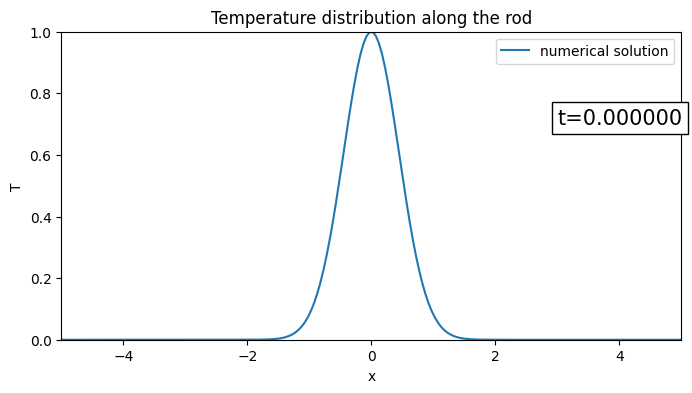

In [29]:
data5 = np.loadtxt('1DThermSolutionH0.05.txt', delimiter=' ')
data1 = np.loadtxt('1DThermSolutionH0.01.txt', delimiter=' ')
x5 = np.loadtxt('1DThermXH0.05.txt', delimiter=' ')
x1 = np.loadtxt('1DThermXH0.01.txt', delimiter=' ')
t1 = np.loadtxt('1DThermT.txt', delimiter=' ')
t5 = np.loadtxt('1DThermT5.txt', delimiter=' ')
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ln1, = plt.plot([],[])
time_text = ax.text(0.65, 0.5, '', fontsize=15, transform = ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
# for el in data5[1:]:
#     ax.plot(data5[0], np.array(el))

def realSol(x, t):
    return np.sqrt(0.1/t)*np.exp(-x**2/(4*t))

#ax.plot(x, realSol(x, t[10]))
def anim(i):
    ax.clear()
    ax.set_xlim((-5,5))
    ax.set_ylim((0,1))
    ax.set_xlabel('x')
    ax.set_ylabel('T')
    ax.set_title('Temperature distribution along the rod')
    ax.plot(x5, data5[i], label = 'numerical solution')
    #ax.plot(x5, realSol(x5, t5[int(i/98)]), label='analytical solution')
    ax.legend(fontsize=10)
    ax.text(0.8, 0.7, 't={:2f}'.format(i/98), fontsize=15, transform = ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
    #time_text.set_text('t={:2f}'.format(i/100))

ani = FuncAnimation(fig, anim, frames=len(data5))
ani.save('1DTherm.gif',writer='pillow',fps=98,dpi=80)
#ax.set_xlim(0, 0.2)

error1 = -1
error5 = -1
for i in range(0, len(data1)-1):
    error1Curr = np.max(np.abs((data1[i] - realSol(x1, t1[i]))))
    if (error1Curr >= error1):
        error1 = error1Curr
for i in range(0, len(data5)-1):
    error5Curr = np.max(np.abs((data5[i] - realSol(x5, t5[i]))))
    if (error5Curr >= error5):
        error5 = error5Curr
(error5, error1)

2.0357708614077734

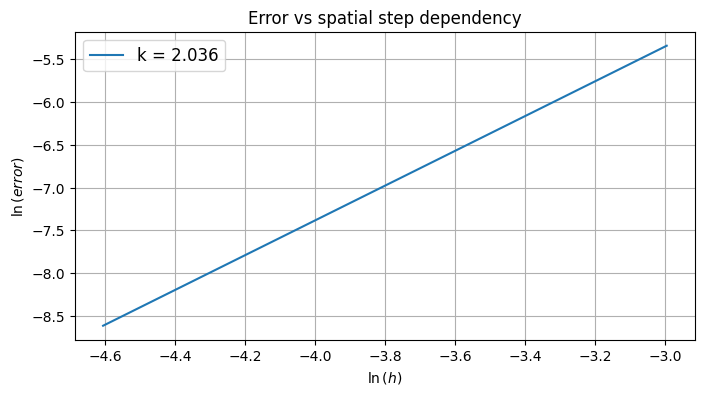

In [4]:
plt.figure(figsize=(8,4))
plt.plot([np.log(0.01), np.log(0.05)], [np.log(error1), np.log(error5)], label = r"k = 2.036")
plt.grid('Major')
plt.xlabel(r"$\ln{(h)}$")
plt.ylabel(r"$\ln{(error)}$")
plt.legend(fontsize = 12)
plt.title('Error vs spatial step dependency')
#plt.savefig('error(step).png', dpi=200, bbox_inches = 'tight')

( np.log(error5) - np.log(error1) ) / (np.log(0.05) - np.log(0.01))